# Understanding Supervised Learning

_Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs_

![Image](../images/ml_map.jpg)

## Before we start:

- __Data exploration:__ 

Shape, Descriptive statistics (numeric, categorical, timestamp), Visualization, Domain knowledge 

- __Data transformations:__ 

Arbitrary, Modeling (joins, feature eng.), Performance (outliers, scaling, encoding)

![Image](https://media.giphy.com/media/ZThQqlxY5BXMc/giphy.gif)

In [1]:
# Imports

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [32]:
# Read data

file = '../data/baseball_1K_ok.csv'
data = pd.read_csv(file)
data.head()

,time,distance,speed
0,0.445878,18.39,41.244510
1,0.509241,18.39,36.112592
2,0.452834,18.39,40.610891
3,0.479029,18.39,38.390194
4,0.426594,18.39,43.108864


In [33]:
# Shape

data.shape

(1000, 3)

In [34]:
# Descriptive statistics

data.describe()

,time,distance,speed
count,1000.000000,1.000000e+03,1000.000000
mean,0.461271,1.839000e+01,40.037693
std,0.030009,2.594779e-13,2.613213
min,0.411414,1.839000e+01,35.812705
25%,0.434189,1.839000e+01,37.690252
50%,0.460938,1.839000e+01,39.896925
75%,0.487925,1.839000e+01,42.354789
max,0.513505,1.839000e+01,44.699547


'../data/baseball_1K_ok.csv'

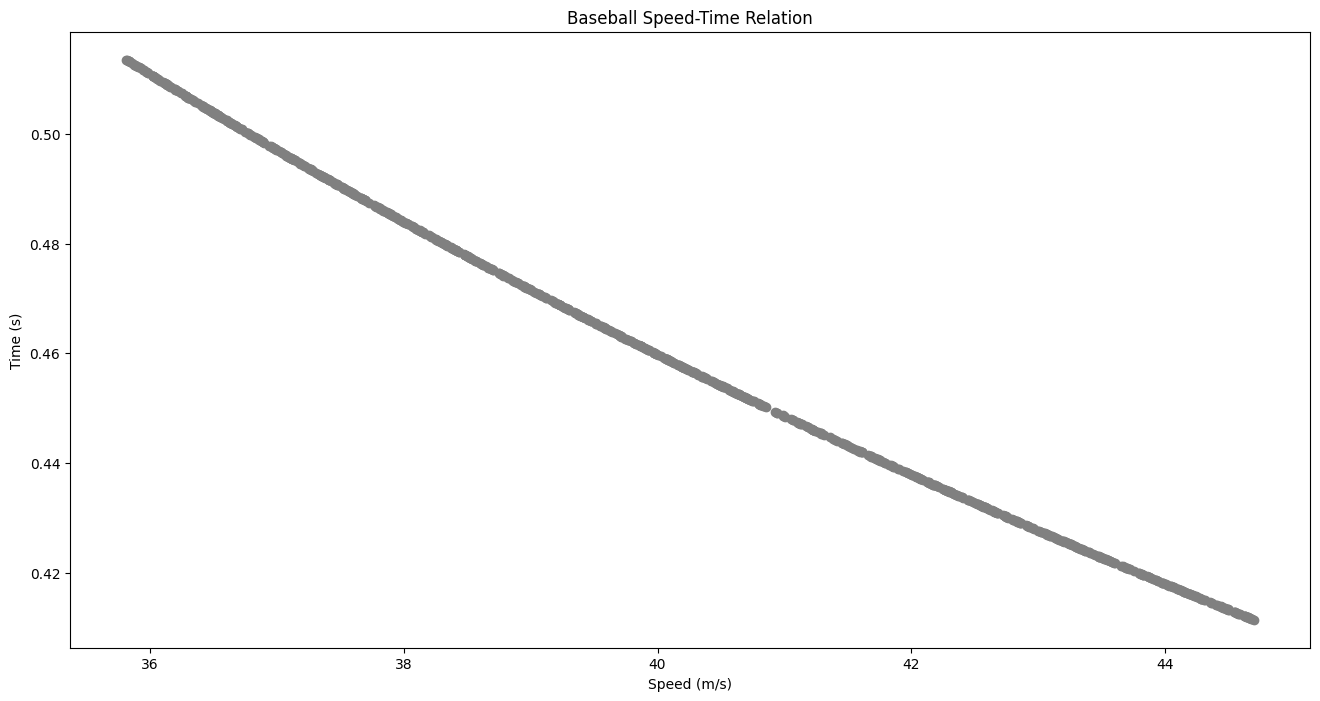

In [35]:
# Visualization

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))
ax.set(xlabel='Speed (m/s)', 
       ylabel='Time (s)',
       title='Baseball Speed-Time Relation')
ax.scatter(data['speed'], data['time'], c='grey')
file

### Domain knowledge

![Image](../images/velocity.png)

![Image](https://media.giphy.com/media/l0HlIJQUdby5FzlZe/giphy.gif)

In [36]:
# Features and predictions

X = data[['time','distance']]
y = data['speed']
print(X.shape,y.shape)

(1000, 2) (1000,)


In [37]:
X

,time,distance
0,0.445878,18.39
1,0.509241,18.39
2,0.452834,18.39
3,0.479029,18.39
4,0.426594,18.39
...,...,...
995,0.423281,18.39
996,0.464441,18.39
997,0.415544,18.39
998,0.453868,18.39


In [38]:
y

0      41.244510
1      36.112592
2      40.610891
3      38.390194
4      43.108864
         ...    
995    43.446365
996    39.596010
997    44.255230
998    40.518357
999    37.839414
Name: speed, Length: 1000, dtype: float64

---

## Train-Test Split:

![Image](../images/train-test-split.jpg)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

X_train: (800, 2), X_test: (200, 2), y_train: (800,), y_test: (200,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [40]:
X_train.describe()

,time,distance
count,800.000000,8.000000e+02
mean,0.461038,1.839000e+01
std,0.030492,1.777468e-13
min,0.411414,1.839000e+01
25%,0.432459,1.839000e+01
50%,0.460693,1.839000e+01
75%,0.488267,1.839000e+01
max,0.513505,1.839000e+01


In [41]:
y_train.describe()

count    800.000000
mean      40.063402
std        2.655365
min       35.812705
25%       37.663856
50%       39.918150
75%       42.524220
max       44.699547
Name: speed, dtype: float64

In [42]:
X_test.describe()

,time,distance
count,200.000000,2.000000e+02
mean,0.462203,1.839000e+01
std,0.028047,3.205466e-14
min,0.411768,1.839000e+01
25%,0.438671,1.839000e+01
50%,0.461261,1.839000e+01
75%,0.483934,1.839000e+01
max,0.512582,1.839000e+01


In [43]:
y_test.describe()

count    200.000000
mean      39.934854
std        2.440953
min       35.877194
25%       38.001033
50%       39.868936
75%       41.922149
max       44.661026
Name: speed, dtype: float64

---

## Models

![Image](../images/models.png)

### _Linear Regression (test-in-training)_ 

In [44]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 336 µs, sys: 225 µs, total: 561 µs
Wall time: 447 µs


In [45]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 5.69 ms, sys: 5.81 ms, total: 11.5 ms
Wall time: 11.2 ms


In [46]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 2.3 ms, sys: 433 µs, total: 2.74 ms
Wall time: 2.66 ms


In [47]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.14118 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Linear Regression (the-real-stuff)_ 

In [48]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 471 µs, sys: 160 µs, total: 631 µs
Wall time: 571 µs


In [49]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 3.98 ms, sys: 1.18 ms, total: 5.17 ms
Wall time: 4.22 ms


In [50]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 2.68 ms, sys: 172 µs, total: 2.85 ms
Wall time: 2.79 ms


In [51]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.14212 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [52]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is 1.01 times the tricky_error


---

### _Random Forest Regressor (test-in-training)_ 

In [53]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 621 µs, sys: 764 µs, total: 1.38 ms
Wall time: 1.33 ms


In [54]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 228 ms, sys: 18.4 ms, total: 246 ms
Wall time: 248 ms


In [55]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 11.1 ms, sys: 2.16 ms, total: 13.2 ms
Wall time: 11.5 ms


In [56]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.00178 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Random Forest Regressor (the-real-stuff)_ 

In [57]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 514 µs, sys: 168 µs, total: 682 µs
Wall time: 633 µs


In [58]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 238 ms, sys: 17.9 ms, total: 256 ms
Wall time: 291 ms


In [59]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 10.6 ms, sys: 1.98 ms, total: 12.5 ms
Wall time: 10.7 ms


In [60]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.00535 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [61]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is 3.01 times the tricky_error


---